In [0]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kshitijalwadhi","key":"867eb86b7df9e0190a9623065cdde2a8"}'}

In [0]:
!mkdir ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 265M/271M [00:06<00:00, 32.5MB/s]
100% 271M/271M [00:06<00:00, 41.9MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 111MB/s]
 96% 521M/544M [00:06<00:00, 65.4MB/s]
100% 544M/544M [00:06<00:00, 89.1MB/s]


In [0]:
mkdir data

In [10]:
!ls

data  kaggle.json  sample_data	sample_submission.csv  test.zip  train.zip


In [ ]:
!unzip test.zip -d data/

In [ ]:
!unzip train.zip -d data

In [0]:
PATH = 'data/'

In [0]:
import os

In [0]:
files = os.listdir(f'{PATH}train')

In [ ]:
files

In [0]:
raw_data = {'fname': [], 'label': []}

In [0]:
for fname in files:
  temp = os.path.join("train/",fname)
  raw_data['fname'].append(temp)
  raw_data['label'].append(fname[:3])

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(raw_data, columns = ['fname', 'label'])

In [33]:
cd ./data

/content/data


In [0]:
df.to_csv(f'labels.csv', index = False)

In [23]:
df.head()

,fname,label
0,train/cat.3754.jpg,cat
1,train/dog.7461.jpg,dog
2,train/dog.10169.jpg,dog
3,train/dog.3897.jpg,dog
4,train/cat.686.jpg,cat


In [0]:
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs=64

In [27]:
!ls

data	     labels.csv   sample_submission.csv  train.zip
kaggle.json  sample_data  test.zip


In [28]:
!pwd

/content


In [29]:
cd ./data

/content/data


In [35]:
!ls

labels.csv  test  train


In [36]:
cd ..

/content


In [0]:
data= ImageDataBunch.from_csv(PATH,ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

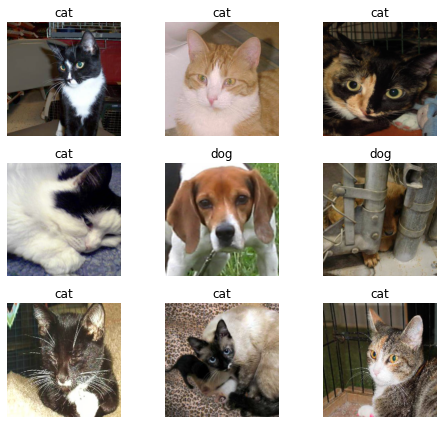

In [38]:
data.show_batch(rows=3, figsize=(7,6))

In [39]:
print(data.classes)
len(data.classes),data.c

['cat', 'dog']


(2, 2)

In [40]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [41]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [42]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.110505,0.042847,0.013600,04:05
1,0.061319,0.030873,0.009200,04:04
2,0.042810,0.026685,0.008600,04:04
3,0.030730,0.024716,0.007600,04:06


In [0]:
learn.save('stage-1')

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

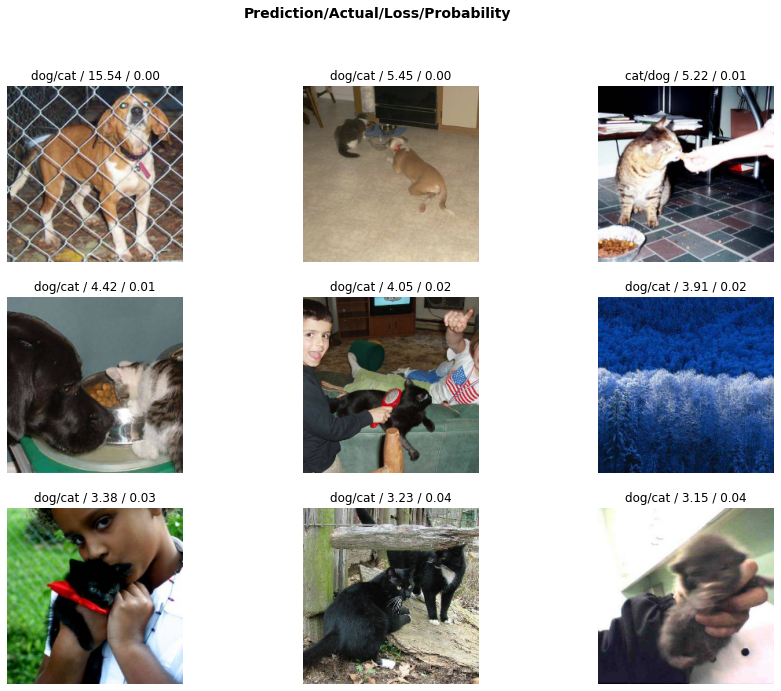

In [45]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.unfreeze()

In [47]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.066174,0.033068,0.011600,04:06


In [0]:
learn.load('stage-1');

In [51]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


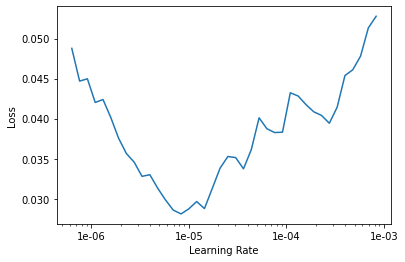

In [52]:
learn.recorder.plot()

In [53]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.029272,0.022849,0.007200,04:06
1,0.025390,0.023305,0.006800,04:05


ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [55]:
!pwd

/content


In [0]:
import numpy as np

In [90]:
!pwd

/content/data


In [91]:
cd ./test

/content/data/test


In [93]:
!ls -l | wc -l

12501


In [130]:
ls

data/        labels.csv    sample_submission.csv  train.zip
kaggle.json  sample_data/  test.zip


In [132]:
test = ImageList.from_folder(os.path.join(PATH, 'test'))
learner = load_learner(PATH, test=test)
preds, _ = learner.get_preds(ds_type=DatasetType.Test)

In [133]:
preds

tensor([[9.9992e-01, 7.5063e-05],
        [1.2188e-05, 9.9999e-01],
        [4.8844e-06, 1.0000e+00],
        ...,
        [9.9986e-01, 1.3812e-04],
        [1.0000e+00, 6.1290e-07],
        [1.0000e+00, 4.6633e-06]])

In [134]:
preds.shape

torch.Size([12500, 2])

In [0]:
dogs_arr = preds[:,1]

In [148]:
dogs_arr

tensor([7.5063e-05, 9.9999e-01, 1.0000e+00,  ..., 1.3812e-04, 6.1290e-07,
        4.6633e-06])

In [149]:
ls

data/        labels.csv    sample_submission.csv  train.zip
kaggle.json  sample_data/  test.zip


In [150]:
cd data

/content/data


In [153]:
ls

export.pkl  labels.csv  models/  test/  train/


In [154]:
cd ..

/content


In [158]:
raw_submission = {'id': [], 'label': preds[:,1]}
for i in range(1,12501):
  raw_submission['id'].append(i)

submission = pd.DataFrame(raw_submission, columns=['id', 'label'])
submission.to_csv(f'{PATH}submission.csv', index = False)
submission.head()

,id,label
0,1,0.000075
1,2,0.999988
2,3,0.999995
3,4,0.521614
4,5,0.999976


In [162]:
cd content/data

/content/data


In [163]:
!kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f submission.csv -m "First try"

100% 207k/207k [00:03<00:00, 62.8kB/s]
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition